In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("License_Data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [7]:
df.head().T

,0,1,2,3,4
ID,35342-20020816,1358463-20051116,1980233-20090722,1476582-20040211,1141408-20080516
LICENSE ID,1256593,1639294,1980233,1476582,1896750
ACCOUNT NUMBER,32811,262311,345008,273121,213785
SITE NUMBER,1,29,1,1,1
LEGAL NAME,CARMEN CAHUE,"ISLA TROPICAL, INC.",DJS REMODELING,ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
DOING BUSINESS AS NAME,CLAUDIA'S BRIDAL SHOP,ISLA TROPICAL,"DJS REMODELING, INC.",ALL-BRY CONSTRUCTION CO.,MCDONOUGH MECHANICAL SERVICE
ADDRESS,2625 S CENTRAL PARK AVE 1,2825 W MONTROSE AVE,1605 CLAVEY RD 1,8 NORTH TRAIL,4081 JOSEPH DR
CITY,CHICAGO,CHICAGO,HIGHLAND,LEMONT,WAUKEGAN
STATE,IL,IL,IL,IL,IL
ZIP CODE,60623.0,60618,60035,60439,60087


In [8]:
df["LICENSE STATUS"].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

In [9]:
# change the columns name
new_col_name = [col.replace(" ","_").lower() for col in df.columns]
df.columns = new_col_name

In [10]:
df.columns

Index(['id', 'license_id', 'account_number', 'site_number', 'legal_name',
       'doing_business_as_name', 'address', 'city', 'state', 'zip_code',
       'ward', 'precinct', 'ward_precinct', 'police_district', 'license_code',
       'license_description', 'license_number', 'application_type',
       'application_created_date', 'application_requirements_complete',
       'payment_date', 'conditional_approval', 'license_term_start_date',
       'license_term_expiration_date', 'license_approved_for_issuance',
       'date_issued', 'license_status_change_date', 'ssa', 'latitude',
       'longitude', 'location', 'license_status'],
      dtype='object')

In [11]:
df["license_description"].value_counts()

Limited Business License                    50078
Home Repair                                 10633
Peddler, non-food                            2812
Home Occupation                              2809
Retail Food Establishment                    2321
                                            ...  
Indoor Special Event                            1
Affiliation                                     1
Airport Pushcart Liquor Midway - Class A        1
Not-For-Profit Club                             1
Motor Vehicle Services License                  1
Name: license_description, Length: 106, dtype: int64

In [12]:
df.license_description.value_counts(normalize=True)[:10]

Limited Business License             0.583014
Home Repair                          0.123791
Peddler, non-food                    0.032738
Home Occupation                      0.032703
Retail Food Establishment            0.027021
Massage Therapist                    0.022725
Street Performer                     0.021992
Scavenger, Private                   0.018034
Hazardous Materials                  0.013109
Residential Real Estate Developer    0.012655
Name: license_description, dtype: float64

### Univariate Analysis

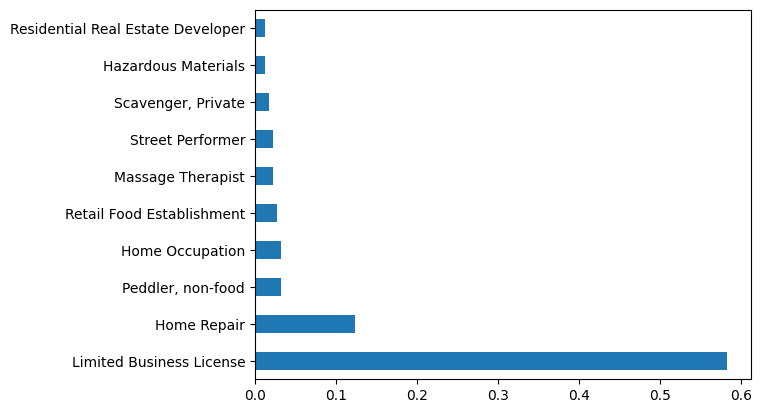

In [13]:
# Let's calculate the percentage of each job status category.
df.license_description.value_counts(normalize=True)
#plot the bar graph of percentage job categories
df.license_description.value_counts(normalize=True)[:10].plot.barh()
plt.show()

<Axes: xlabel='latitude', ylabel='Density'>

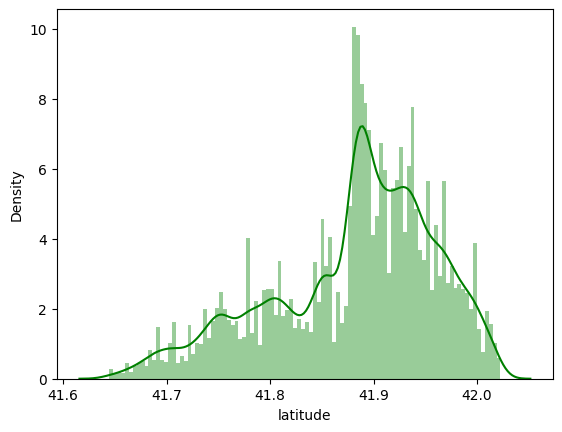

In [14]:
sns.distplot(df['latitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

<Axes: xlabel='longitude', ylabel='Density'>

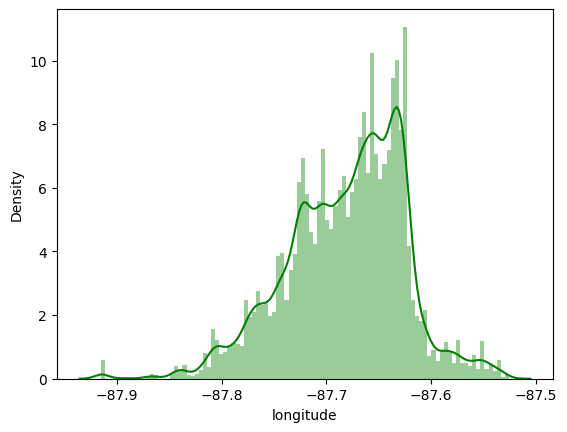

In [16]:
sns.distplot(df['longitude'], color='g', bins=100, hist_kws={'alpha': 0.4})

### Bivariate Analysis

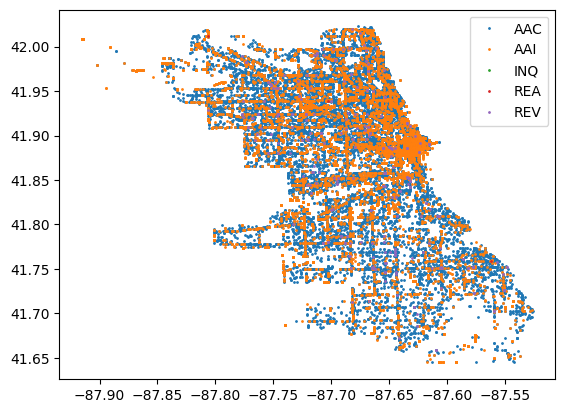

In [17]:
sdf = df[["longitude","latitude","license_status"]]
groups = sdf.groupby('license_status')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.longitude, group.latitude, marker='o', linestyle='', ms=1, label=name)
ax.legend()

plt.show()

In [18]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index()

application_type,license_status,C_CAPA,C_EXPA,C_LOC,ISSUE,RENEW
0,AAC,7,3,287,7916,21987
1,AAI,0,0,1112,15425,38863
2,INQ,0,0,0,2,0
3,REA,0,0,0,0,3
4,REV,0,2,1,55,232


In [58]:
pd.crosstab(df["license_status"],df["application_type"]).columns

Index(['C_CAPA', 'C_EXPA', 'C_LOC', 'ISSUE', 'RENEW'], dtype='object', name='application_type')

<Axes: title={'center': 'Application Type vs License Status'}, xlabel='license_status'>

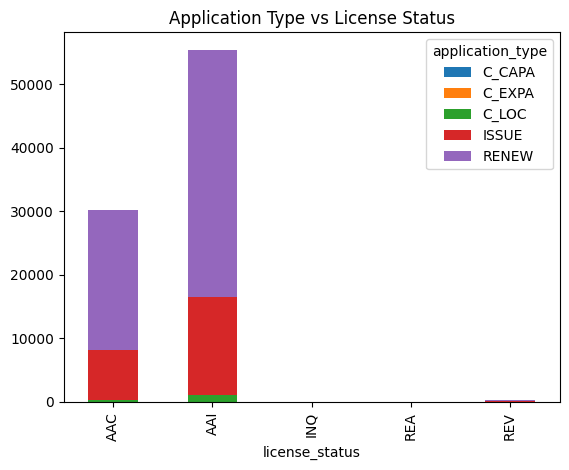

In [19]:
pd.crosstab(df["license_status"],df["application_type"]).reset_index().plot(x='license_status', kind='bar', stacked=True,
        title='Application Type vs License Status')

In [20]:
pd.crosstab(df["license_status"],df["conditional_approval"])

conditional_approval,N,Y
license_status,,
AAC,30182,18
AAI,55400,0
INQ,2,0
REA,3,0
REV,290,0


### Outlier Detection 

<Axes: xlabel='precinct', ylabel='Density'>

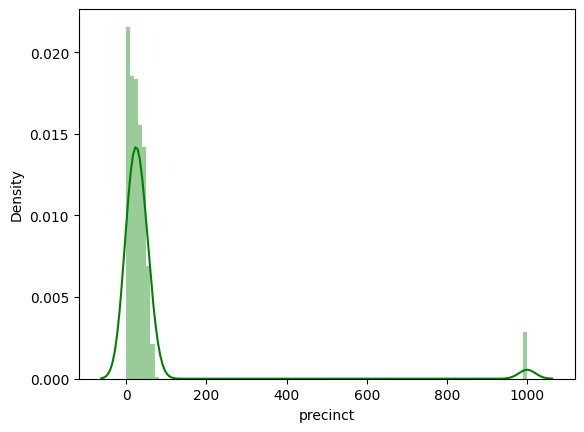

In [21]:
sns.distplot(df['precinct'], color='g', bins=100, hist_kws={'alpha': 0.4})

#### Box Plot

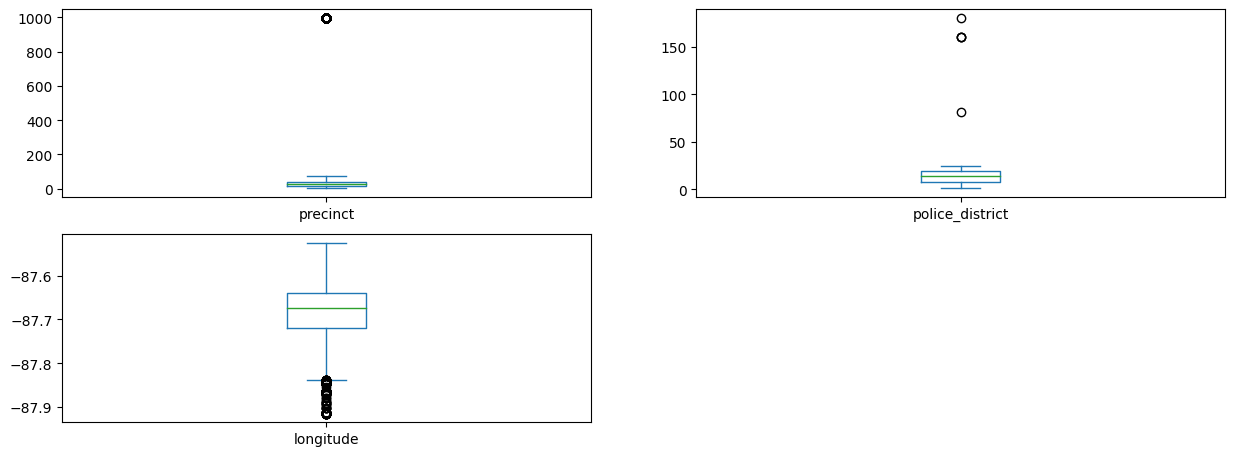

In [22]:
df[["precinct","police_district","longitude"]].plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

### Inter Quartile Range
IQR = 75th percentile - 25th percentile <br>
<br>
Lower Bound = q1–1.5*IQR <br>
Upper Bound = q3+1.5*IQR <br>

In [23]:
#FUNCTION TO IDENTIFY OUTLIERS USING IQR METHOD
def iqr(col):
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    min_ = q1 - 1.5 * iqr
    max_ = q3 + 1.5 * iqr
    return col[((col < min_) | (col > max_))]

In [24]:
iqr(df.precinct)

9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64

###  Z-score method

Z-Score = (X-mean) / Standard deviation

In [25]:
#FUNCTION TO DETECT OUTLIERS USING Z-SCORE METHOD
def zscore_outlier(col,lb,ub):
    zscore = ((col - col.mean()) / col.std()).copy()
    return col[((zscore < lb) | (zscore > ub))]

In [26]:
zscore_outlier(df.precinct,-3,3)

9        999.0
33       999.0
70       999.0
215      999.0
347      999.0
         ...  
85117    999.0
85279    999.0
85718    999.0
85781    999.0
85820    999.0
Name: precinct, Length: 838, dtype: float64